In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
def plot_features(data):

    fig = plt.figure(figsize=(120, 60))

    cols = 5
    rows = int(np.ceil(float(data.shape[1]/cols)))

    for index, column in enumerate(data.columns):
        ax = fig.add_subplot(rows, cols, index+1)
        ax.set_title(column)
        if data[column].dtype == object:
            data[column].value_counts().plot(kind='bar', axes=ax)
        else:
            data[column].hist(axes=ax)
            plt.xticks(rotation='vertical')

    plt.subplots_adjust(hspace=.5, wspace=.2)
    plt.show()
    
def number_encode_features(df):
    result=df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object:
            encoders[column] = LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
        
    return result, encoders

def train_clf(X, y, targetid):
    
    # Ajusta el clasificador sobre un conjunto de variables X y una target y.
    
    np.random.seed(0) # se fija la semilla aleatoria para el split
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
    
    log_reg = LogisticRegression().fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=encoders[targetid].classes_,
                yticklabels=encoders[targetid].classes_)
    plt.xlabel('Predicted Value')
    plt.ylabel('Actual Value')
    plt.show()
    
    print('\n')
    print(classification_report(y_test, y_pred))

    
    return 

In [3]:
# extraccion de las cabeceras desde el fichero header.txt (linux ubuntu 20.04)
!cut -d ' ' -f2 dataset/header.txt | grep -v DATA | grep -v income | sed 's/.*/&/' | paste -s -d "," >> dataset/headers.txt

with open ('dataset/headers.txt', 'r') as f:
    line = f.readline()

header = line.strip().split(',')

In [30]:
data_original = pd.read_csv('dataset/census-income_1K.data')
data_original.columns = header

In [31]:
data_original.head(5)

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,class
0,9,Not_in_universe,0,0,Children,0,Not_in_universe,Never_married,Not_in_universe_or_children,Not_in_universe,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,0,0,94,-_50000.
1,10,Not_in_universe,0,0,Children,0,Not_in_universe,Never_married,Not_in_universe_or_children,Not_in_universe,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,0,0,94,-_50000.
2,42,Private,34,3,Bachelors_degree(BA_AB_BS),0,Not_in_universe,Married-civilian_spouse_present,Finance_insurance_and_real_estate,Executive_admin_and_managerial,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,2,52,94,-_50000.
3,34,Private,4,37,Some_college_but_no_degree,0,Not_in_universe,Married-civilian_spouse_present,Construction,Machine_operators_assmblrs_&_inspctrs,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,2,52,94,-_50000.
4,8,Not_in_universe,0,0,Children,0,Not_in_universe,Never_married,Not_in_universe_or_children,Not_in_universe,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,0,0,94,-_50000.


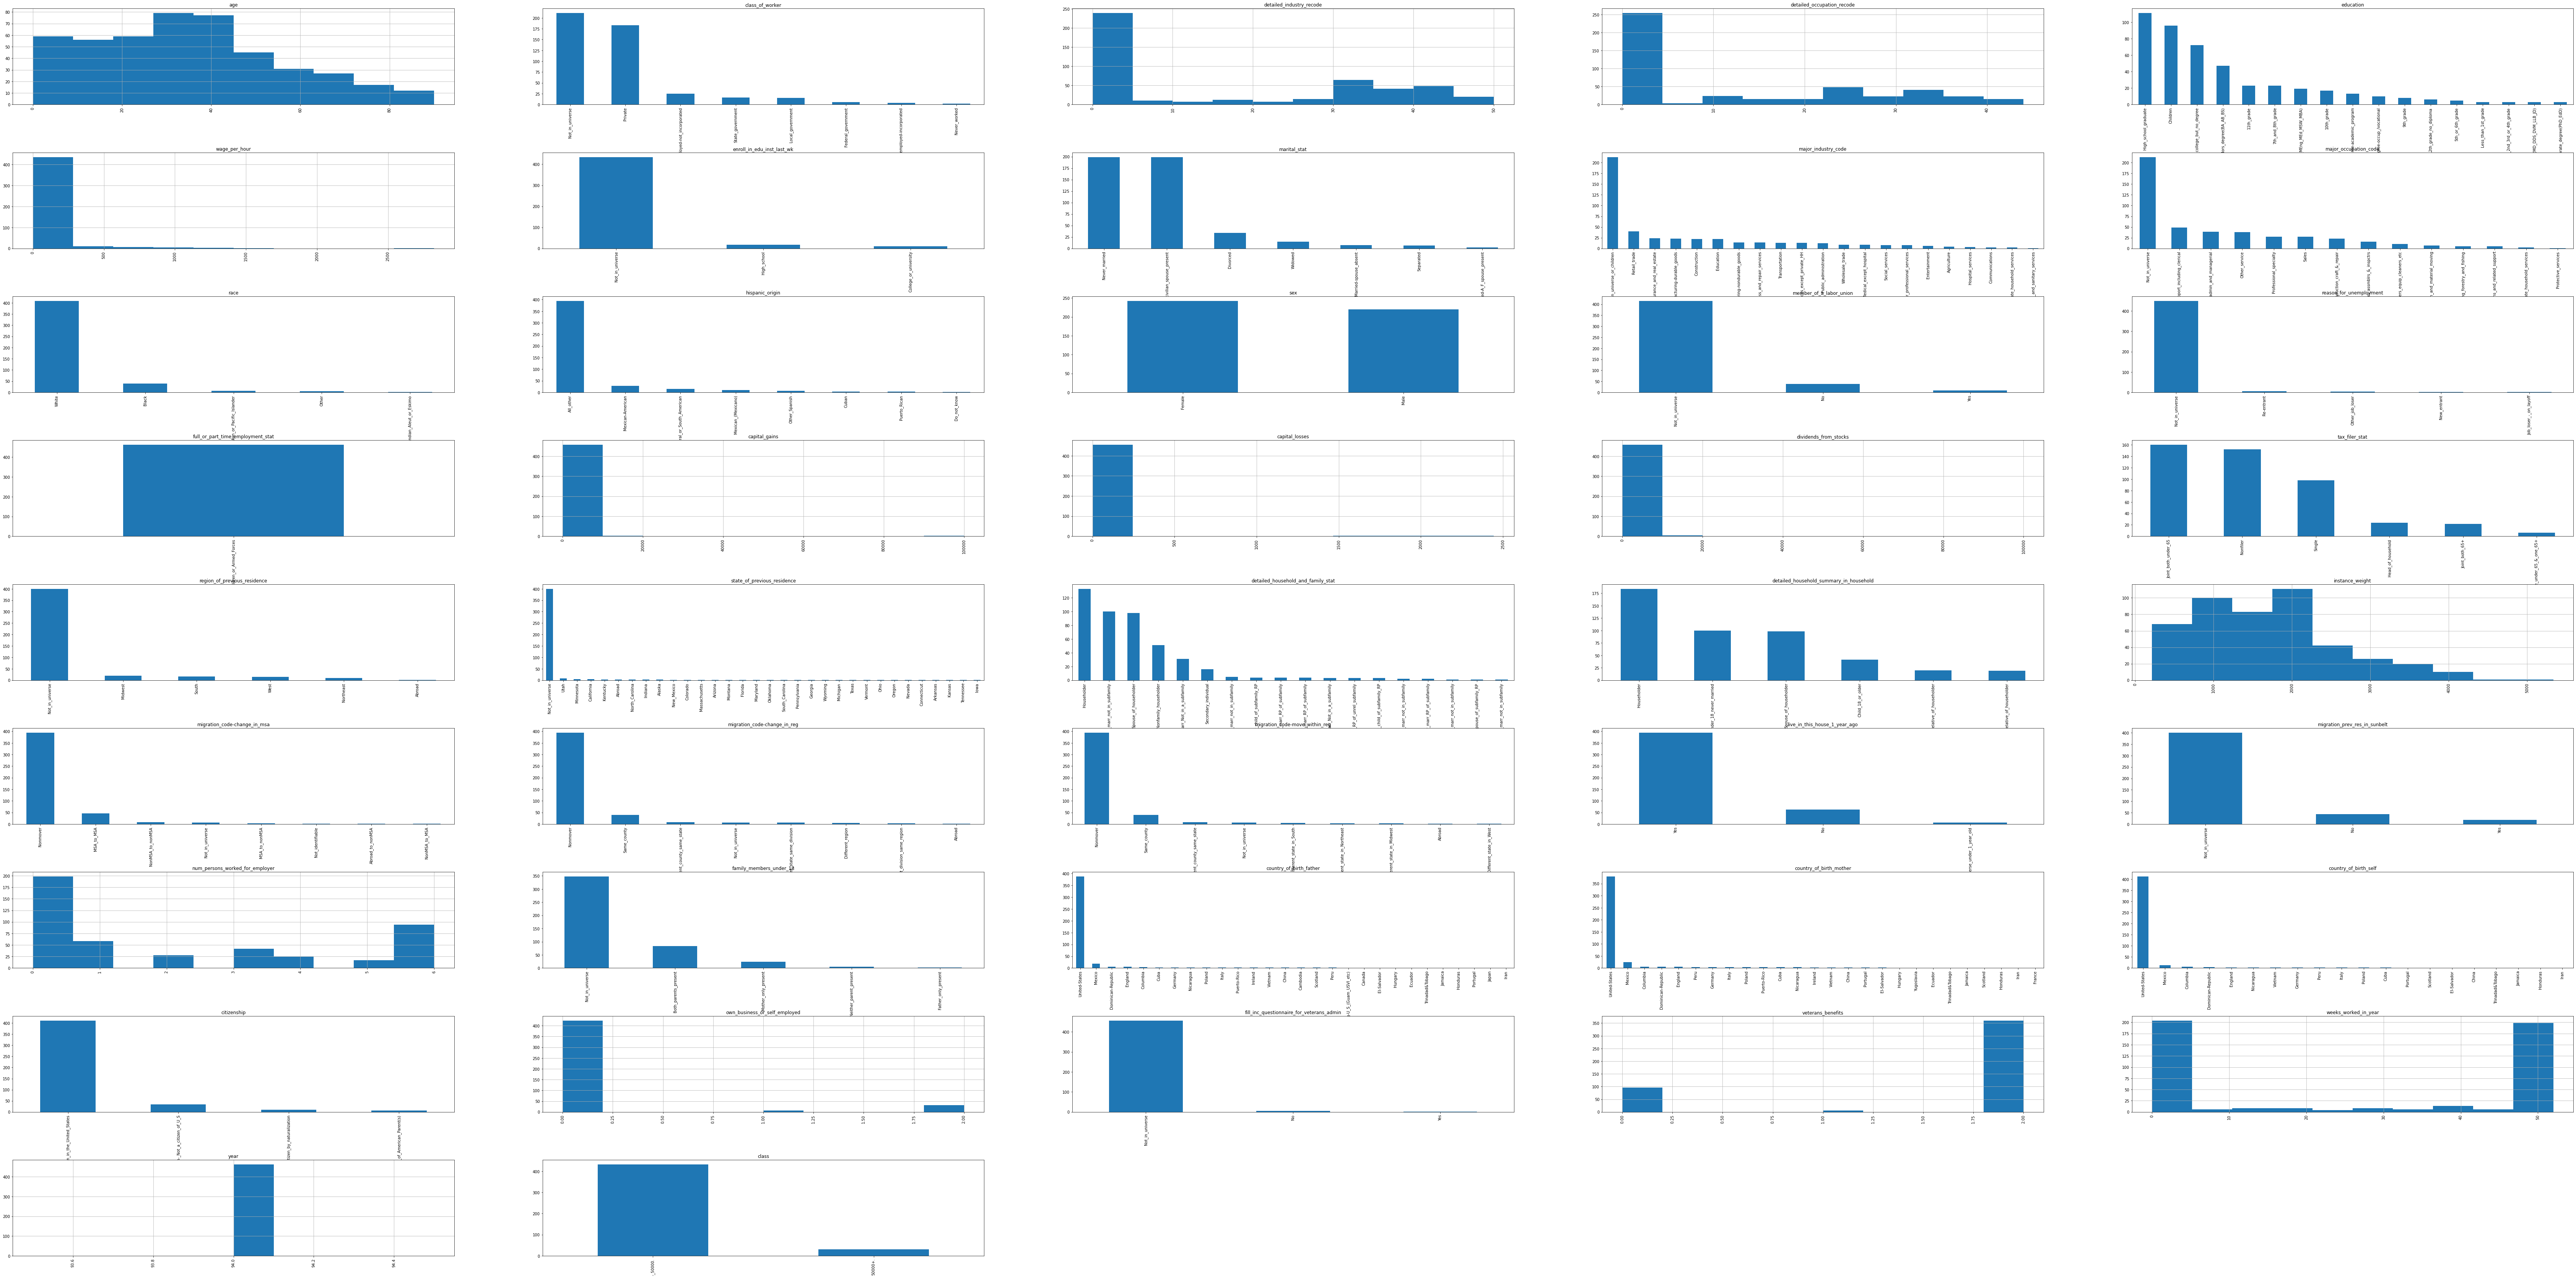

In [32]:
plot_features(data_original)

In [33]:
data_encoded, encoders = number_encode_features(data_original)

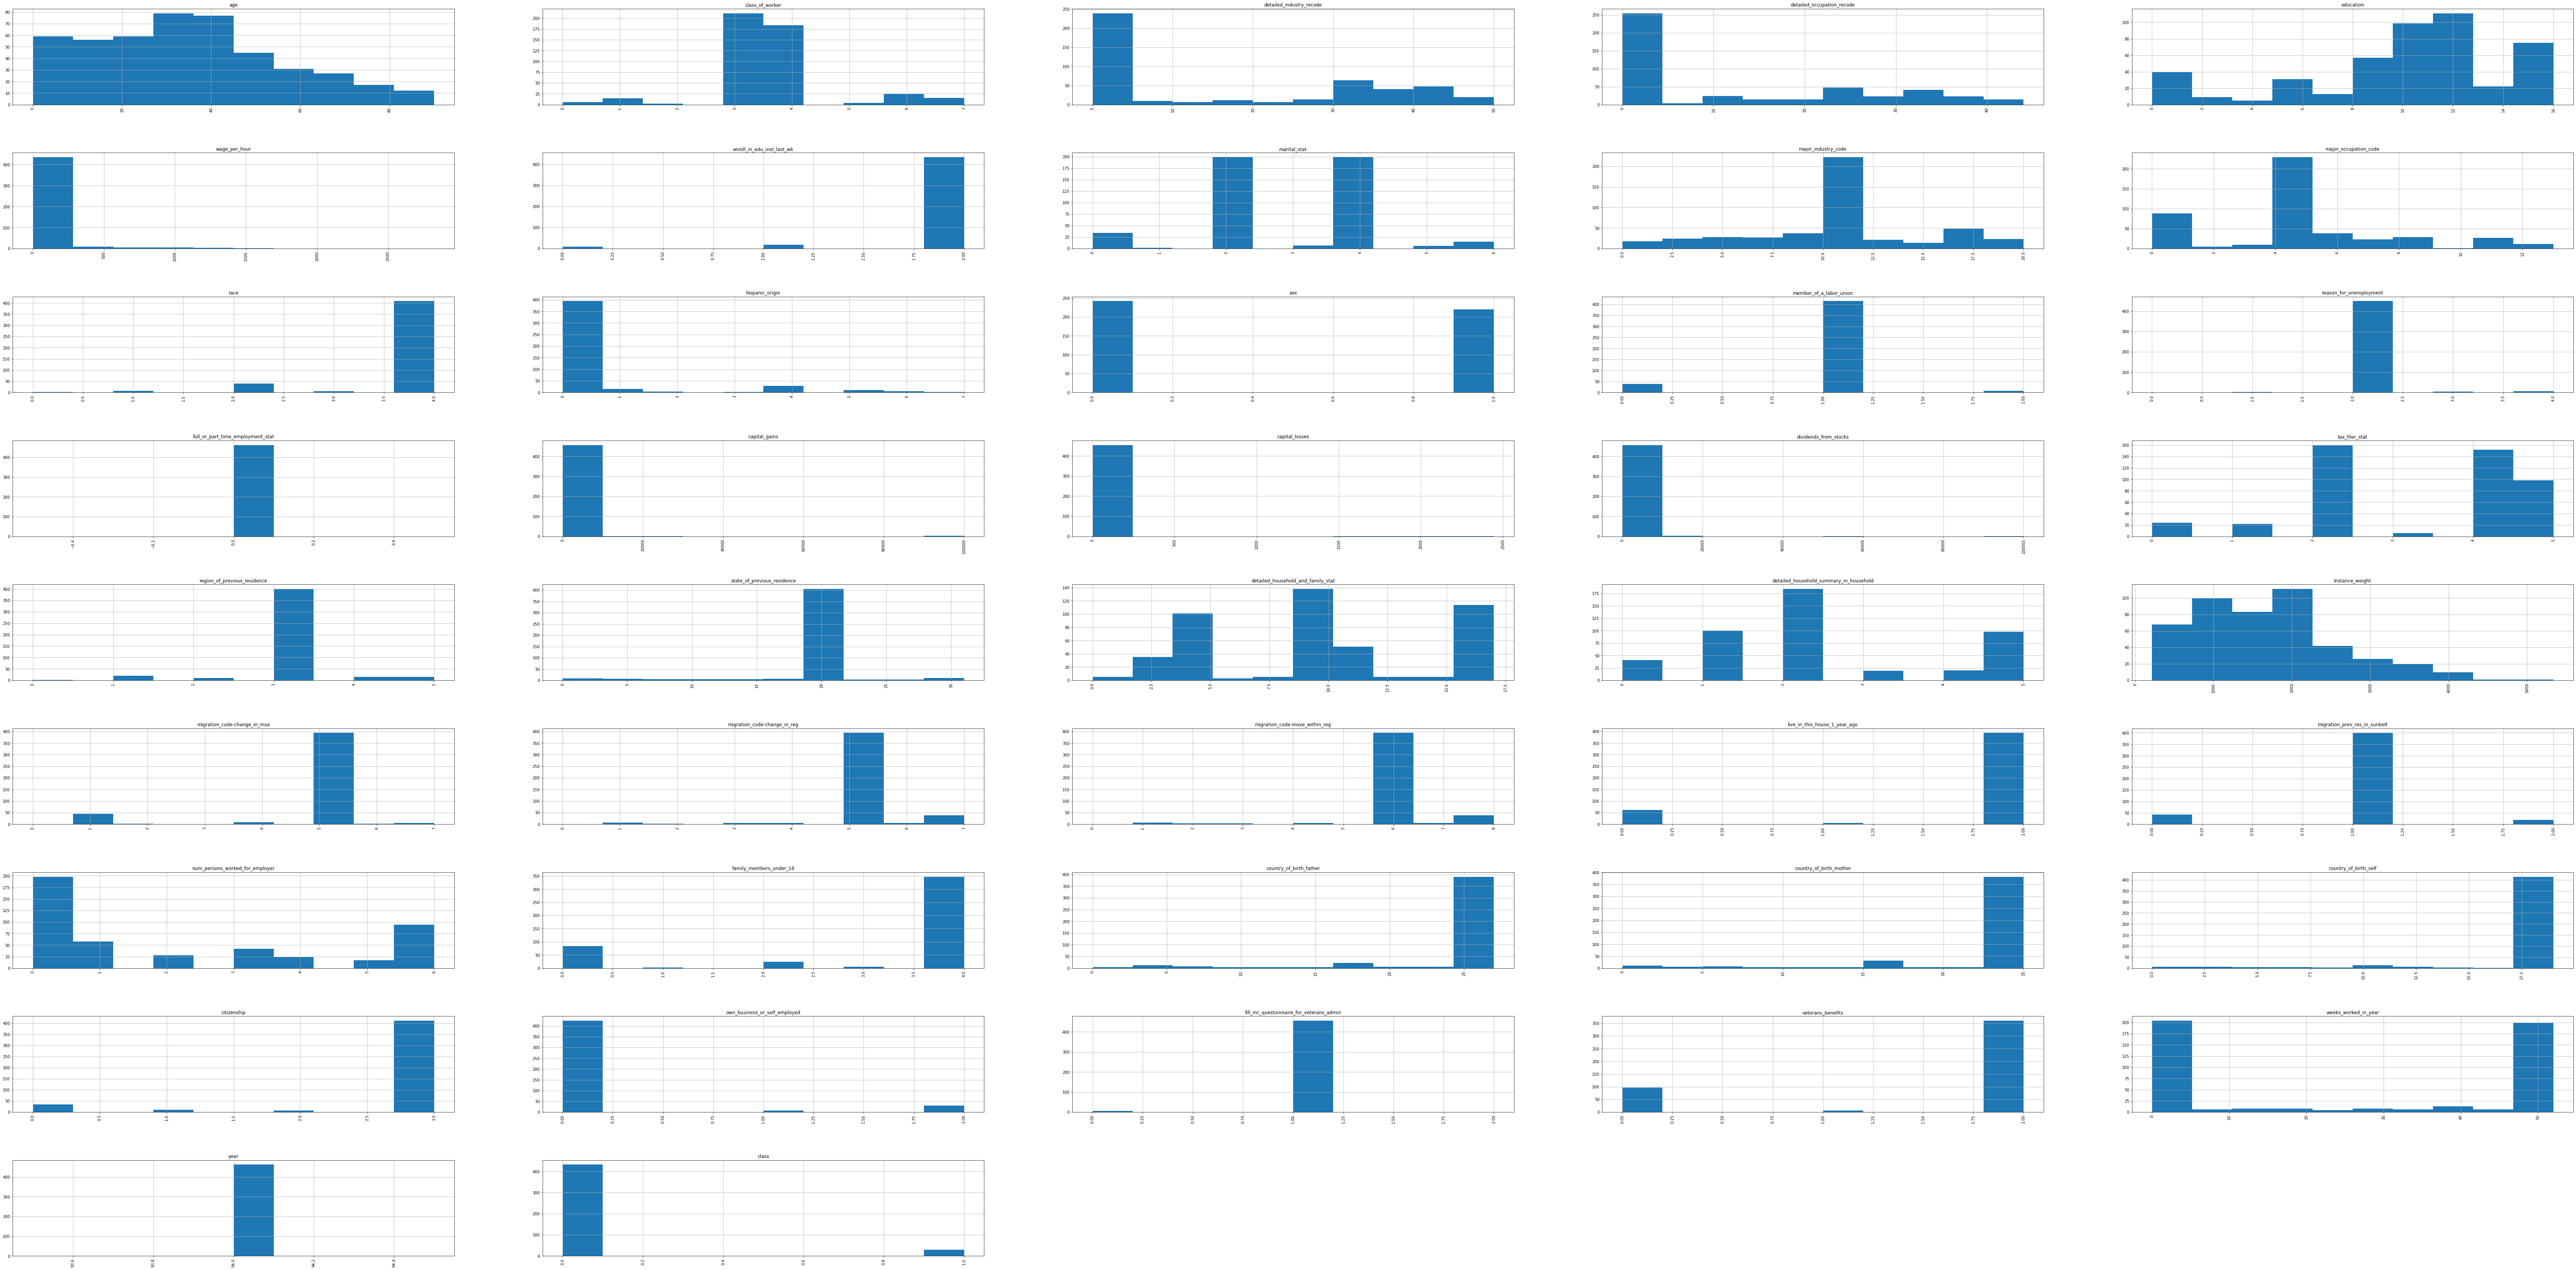

In [34]:
plot_features(data_encoded)

In [35]:
target = 'class'
X, y = data_encoded[data_encoded.columns.difference([target])], data_encoded[target]

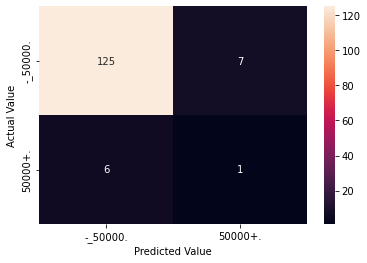



              precision    recall  f1-score   support

           0       0.95      0.95      0.95       132
           1       0.12      0.14      0.13         7

    accuracy                           0.91       139
   macro avg       0.54      0.54      0.54       139
weighted avg       0.91      0.91      0.91       139



In [36]:
train_clf(X, y, 'class')

# PARTE I

In [37]:
! ls dataset/ | grep Anon >> Anon_files.txt

with open ('Anon_files.txt', 'r') as f:
    files = f.readlines()
    
! rm Anon_files.txt

files_list = [file_name.strip() for file_name in files]
files_list # DF: Datafly, IXX: Incognito_XX, MD: Mondrian

['census-income_Anon_DF.data',
 'census-income_Anon_I17.data',
 'census-income_Anon_I2.data',
 'census-income_Anon_I32.data',
 'census-income_Anon_I8.data',
 'census-income_Anon_MD.data']

ANON METHOD: census-income_Anon_DF.data


dim:  (463, 40) 


 Sample:

                                    col0    col10     col39
0  61.333333333333336:51.914529914529915  0.0:1.0  -_50000.
1    11.578947368421053:57.5858725761773  1.0:0.0  -_50000.
2    11.578947368421053:57.5858725761773  1.0:0.0  -_50000.




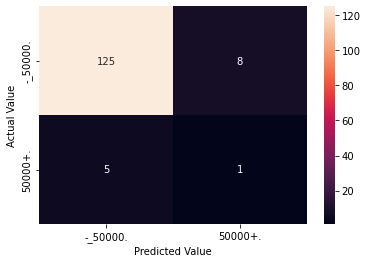



              precision    recall  f1-score   support

           0       0.96      0.94      0.95       133
           1       0.11      0.17      0.13         6

    accuracy                           0.91       139
   macro avg       0.54      0.55      0.54       139
weighted avg       0.92      0.91      0.92       139

ANON METHOD: census-income_Anon_I17.data


dim:  (463, 40) 


 Sample:

                                   col0  \
0             60.9125:50.30484375000001   
1  11.721518987341772:55.45409389520911   
2  11.721518987341772:55.45409389520911   

                                   col10     col39  
0                          0.5125:0.4875  -_50000.  
1  0.4810126582278481:0.5189873417721519  -_50000.  
2  0.4810126582278481:0.5189873417721519  -_50000.  




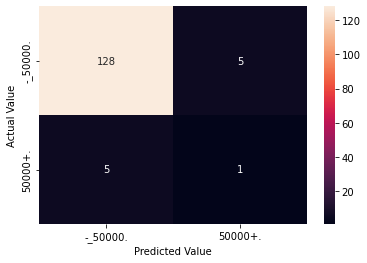



              precision    recall  f1-score   support

           0       0.96      0.96      0.96       133
           1       0.17      0.17      0.17         6

    accuracy                           0.93       139
   macro avg       0.56      0.56      0.56       139
weighted avg       0.93      0.93      0.93       139

ANON METHOD: census-income_Anon_I2.data


dim:  (463, 40) 


 Sample:

                                    col0    col10     col39
0  61.333333333333336:51.914529914529915  0.0:1.0  -_50000.
1    11.578947368421053:57.5858725761773  1.0:0.0  -_50000.
2    11.578947368421053:57.5858725761773  1.0:0.0  -_50000.




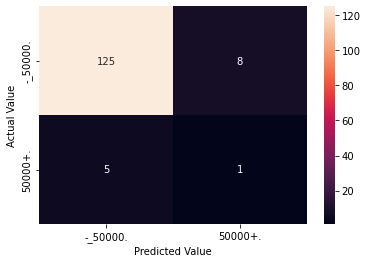



              precision    recall  f1-score   support

           0       0.96      0.94      0.95       133
           1       0.11      0.17      0.13         6

    accuracy                           0.91       139
   macro avg       0.54      0.55      0.54       139
weighted avg       0.92      0.91      0.92       139

ANON METHOD: census-income_Anon_I32.data


dim:  (463, 40) 


 Sample:

                                   col0    col10     col39
0   64.02173913043478:86.02126654064271  0.0:1.0  -_50000.
1  26.419354838709676:203.0284425945196  1.0:0.0  -_50000.
2  26.419354838709676:203.0284425945196  1.0:0.0  -_50000.




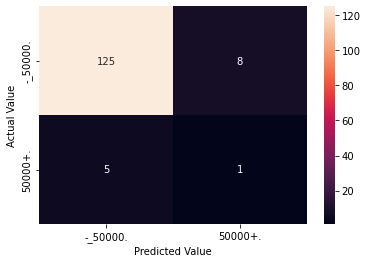



              precision    recall  f1-score   support

           0       0.96      0.94      0.95       133
           1       0.11      0.17      0.13         6

    accuracy                           0.91       139
   macro avg       0.54      0.55      0.54       139
weighted avg       0.92      0.91      0.92       139

ANON METHOD: census-income_Anon_I8.data


dim:  (463, 40) 


 Sample:

                                   col0  \
0             60.9125:50.30484375000001   
1  11.721518987341772:55.45409389520911   
2  11.721518987341772:55.45409389520911   

                                   col10     col39  
0                          0.5125:0.4875  -_50000.  
1  0.4810126582278481:0.5189873417721519  -_50000.  
2  0.4810126582278481:0.5189873417721519  -_50000.  




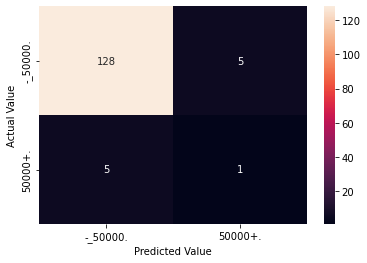



              precision    recall  f1-score   support

           0       0.96      0.96      0.96       133
           1       0.17      0.17      0.17         6

    accuracy                           0.93       139
   macro avg       0.56      0.56      0.56       139
weighted avg       0.93      0.93      0.93       139

ANON METHOD: census-income_Anon_MD.data


dim:  (463, 40) 


 Sample:

                                   col0    col10     col39
0  61.72222222222222:103.79320987654317  0.0:1.0  -_50000.
1    8.80327868852459:32.48589088954582  1.0:0.0  -_50000.
2    8.80327868852459:32.48589088954582  1.0:0.0  -_50000.




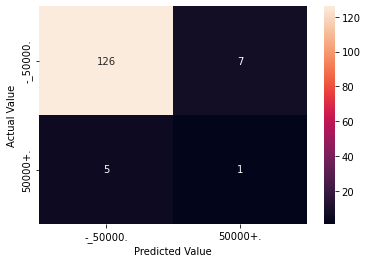



              precision    recall  f1-score   support

           0       0.96      0.95      0.95       133
           1       0.12      0.17      0.14         6

    accuracy                           0.91       139
   macro avg       0.54      0.56      0.55       139
weighted avg       0.93      0.91      0.92       139



In [87]:
for file_name in files_list:
    
    
    print(f'ANON METHOD: {file_name}\n\n')
    data = pd.read_csv(f'dataset/{file_name}', header=None)
    print('dim: ', data.shape, '\n')

    headers = [f'col{i}' for i in range(0,data.shape[1])]
    data.columns = headers
    print('\n Sample:\n')
    print(data.iloc[:3, [0, 10, -1]])
    print('\n')
    
    data_encoded, encoders = number_encode_features(data)
    target = f'col{data.shape[1]-1}'
    X, y = data_encoded[data_encoded.columns.difference([target])], data_encoded[target]
    
    train_clf(X, y, target)

No se observan cambios significativos en los F1 entre todos los métodos de anonimización en los resultados del clasificador, ya que todas las puntuaciones se asemejan.

# PARTE II


Comparativa histogramas AGE



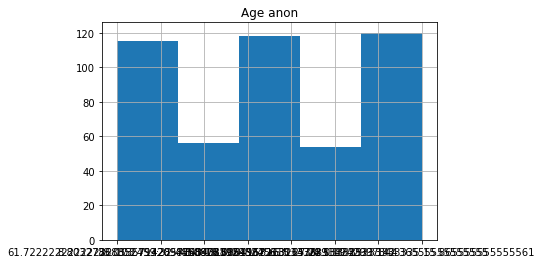

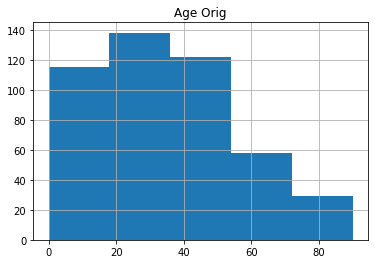


Comparativa histogramas SEX



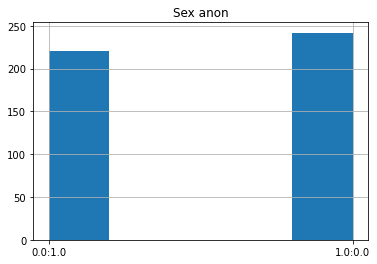

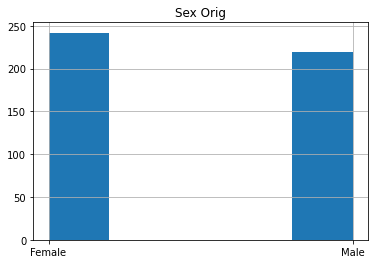


Comparativa histogramas SALARY



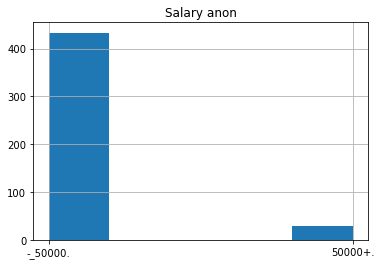

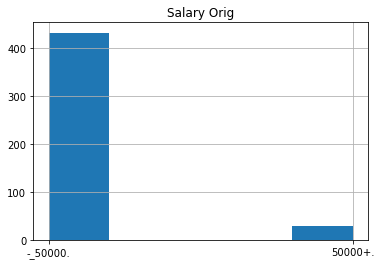

In [75]:
print('\nComparativa histogramas AGE\n')


data.iloc[:, 0].hist(bins=5)
plt.title('Age anon')
plt.show()
data_original.iloc[:, 0].hist(bins=5)
plt.title('Age Orig')
plt.show()

print('\nComparativa histogramas SEX\n')
plt.title('Sex anon')
data.iloc[:, 10].hist(bins=5)
plt.show()
data_original.iloc[:, 12].hist(bins=5)
plt.title('Sex Orig')
plt.show()

print('\nComparativa histogramas SALARY\n')
plt.title('Salary anon')
data.iloc[:, -1].hist(bins=5)
plt.show()
data_original.iloc[:, -1].hist(bins=5)
plt.title('Salary Orig')
plt.show()

Se observa que la variable Age se ha transformado a una variable categorica con una distribucion distinta a la original. La variable Sex se ha transformado a una variable categorica muy similar a la original. La variable target no se ha transformado.

### ¿Tiene el fichero anonimizado el mismo número de columnas que el fichero original? Si no es así, ¿por qué tiene un número distinto de columnas?

In [82]:
data_original.shape[1] # dataset/census-income_1K.data

42

In [83]:
data.shape[1] # census-income_Anon_MD.data

40

Se observa que faltan dos columnas en el dataset anonimizado respecto del dataset original. 

In [92]:
data.iloc[:, :5]

,col0,col1,col2,col3,col4
0,61.72222222222222:103.79320987654317,34,Some_college_but_no_degree,0,Not_in_universe
1,8.80327868852459:32.48589088954582,0,Children,0,Not_in_universe
2,8.80327868852459:32.48589088954582,0,Children,0,Not_in_universe
3,38.05357142857143:16.58641581632653,3,Bachelors_degree(BA_AB_BS),0,Not_in_universe
4,38.05357142857143:16.58641581632653,37,Some_college_but_no_degree,0,Not_in_universe
...,...,...,...,...,...
458,65.03333333333333:142.36555555555555,0,Associates_degree-academic_program,0,Not_in_universe
459,28.033333333333335:15.865555555555561,0,Associates_degree-academic_program,0,Not_in_universe
460,24.5:19.25,0,Some_college_but_no_degree,0,Not_in_universe
461,38.05357142857143:16.58641581632653,0,Some_college_but_no_degree,0,Not_in_universe


In [93]:
data_original.iloc[:, :5]

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education
0,9,Not_in_universe,0,0,Children
1,10,Not_in_universe,0,0,Children
2,42,Private,34,3,Bachelors_degree(BA_AB_BS)
3,34,Private,4,37,Some_college_but_no_degree
4,8,Not_in_universe,0,0,Children
...,...,...,...,...,...
457,78,Not_in_universe,0,0,Associates_degree-academic_program
458,31,Not_in_universe,0,0,Associates_degree-academic_program
459,26,Not_in_universe,0,0,Some_college_but_no_degree
460,36,Not_in_universe,0,0,Some_college_but_no_degree


Se observa que se han eliminado los identificadores (atributos 1 y 2) especificados en el cofig.xml.

# ANALIZAR COMO COMPARAR SEX Y CLASS AQUI 

In [88]:
data_original

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,class
0,9,Not_in_universe,0,0,Children,0,Not_in_universe,Never_married,Not_in_universe_or_children,Not_in_universe,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,0,0,94,-_50000.
1,10,Not_in_universe,0,0,Children,0,Not_in_universe,Never_married,Not_in_universe_or_children,Not_in_universe,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,0,0,94,-_50000.
2,42,Private,34,3,Bachelors_degree(BA_AB_BS),0,Not_in_universe,Married-civilian_spouse_present,Finance_insurance_and_real_estate,Executive_admin_and_managerial,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,2,52,94,-_50000.
3,34,Private,4,37,Some_college_but_no_degree,0,Not_in_universe,Married-civilian_spouse_present,Construction,Machine_operators_assmblrs_&_inspctrs,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,2,52,94,-_50000.
4,8,Not_in_universe,0,0,Children,0,Not_in_universe,Never_married,Not_in_universe_or_children,Not_in_universe,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,0,0,94,-_50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,78,Not_in_universe,0,0,Associates_degree-academic_program,0,Not_in_universe,Married-civilian_spouse_present,Not_in_universe_or_children,Not_in_universe,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,2,0,94,50000+.
458,31,Not_in_universe,0,0,Associates_degree-academic_program,0,Not_in_universe,Married-A_F_spouse_present,Not_in_universe_or_children,Not_in_universe,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,2,30,94,-_50000.
459,26,Not_in_universe,0,0,Some_college_but_no_degree,0,Not_in_universe,Never_married,Not_in_universe_or_children,Not_in_universe,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,2,32,94,-_50000.
460,36,Not_in_universe,0,0,Some_college_but_no_degree,0,Not_in_universe,Married-civilian_spouse_present,Not_in_universe_or_children,Not_in_universe,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,2,20,94,-_50000.
